### Load Crisis free form data

In [75]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [76]:
responses_df = pd.read_csv('Data/CrisisLogger/crisislogger.csv',header=0)

In [77]:
responses_df

,upload_id,transcriptions
0,10,so high our experience so far has been a littl...
1,209,I'm not going to stay in my name for the anony...
2,216,so far I have been florentines now for about a...
3,222,it has actually been a very difficult. Trying ...
4,228,so this whole situation has been strange for u...
...,...,...
135,750,I am a parent of a 5th grader going into 6th g...
136,752,over 19 really impacted us because and it's no...
137,754,so today is May 20th and has been over for abo...
138,756,hi my name is divyansh not trying and I live i...


### Preprocess Raw text - to remove stop words, punctuation and lemmatize word to root form

In [78]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))

def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letnum_text =  re.sub("[^a-zA-Z0-9\s]+", " ",raw_text )

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letnum_text.lower().split()

    cleaned_words = []
    lemmatizer = WordNetLemmatizer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.lemmatize(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSUSERSL123\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MSUSERSL123\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Test code to lemmatize, stem words

In [79]:
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
import nltk

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

word = "considering"

stemmed_word =  stemmer.stem(word)
lemmatised_word = lemmatizer.lemmatize(word)

print(stemmed_word)
print(lemmatised_word)

consid
considering


In [80]:
test_sentence = "this is a sentence to demonstrate how the preprocessing function works...!"

preprocess(test_sentence)

'sentence demonstrate preprocessing function work'

In [81]:
responses_df['prep'] = responses_df['transcriptions'].apply(preprocess)  

In [82]:
responses_df.head()

,upload_id,transcriptions,prep
0,10,so high our experience so far has been a littl...,high experience far little bit difficult teena...
1,209,I'm not going to stay in my name for the anony...,going stay name anonymity mid forty remotely w...
2,216,so far I have been florentines now for about a...,far florentine month half tough seems mean new...
3,222,it has actually been a very difficult. Trying ...,actually difficult trying get adjusted change ...
4,228,so this whole situation has been strange for u...,whole situation strange u feel lucky laid unem...


### Word Counter

In [83]:
from collections import Counter
Counter(" ".join(responses_df["prep"]).split()).most_common(20)

[('know', 271),
 ('time', 185),
 ('like', 183),
 ('school', 175),
 ('really', 149),
 ('going', 144),
 ('home', 131),
 ('get', 127),
 ('think', 125),
 ('thing', 122),
 ('work', 113),
 ('go', 112),
 ('child', 106),
 ('family', 100),
 ('day', 97),
 ('lot', 90),
 ('kid', 89),
 ('feel', 88),
 ('u', 88),
 ('friend', 86)]

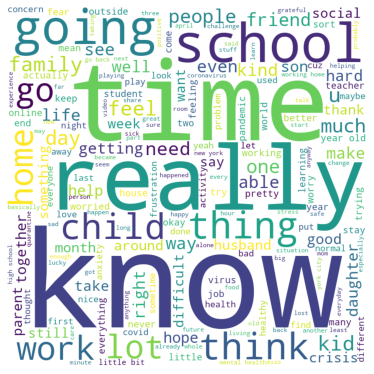

In [84]:
#nice library to produce wordclouds
from wordcloud import WordCloud

import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

all_words = '' 

#looping through all incidents and joining them to one text, to extract most common words
for arg in responses_df["prep"]: 

    tokens = arg.split()  
      
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Sentiment Analysis

### TextBlob 

In [85]:
from textblob import TextBlob

def textblob_sentiment(prep_text):
    testimonial = TextBlob(prep_text)
    return testimonial.sentiment.polarity


def get_sentiment(score):
    if score>0:
        return 'Positive'
    elif score<0:
        return 'Negative'
    else:
        return 'Neutral'
    
def create_report(data):
    neg_records=0
    pos_records=0
    neu_records=0
    for index, row in data.iterrows():
        if row['Polarity']=='Positive':
            pos_records=pos_records+1
        elif row['Polarity']=='Negative':
            neg_records=neg_records+1
        else:
            neu_records=neu_records+1    
    summ_data = {'Class':['Positive','Negative', 'Neutral'],
                 'Count':[pos_records, neg_records, neu_records]}
    summary_df = pd.DataFrame(summ_data)    
    plt.figure(figsize=(16,8))
    # plot chart
    ax1 = plt.subplot(121, aspect='equal')
    summary_df.plot(kind='pie', ax=ax1, autopct='%1.1f%%', 
     startangle=90, shadow=False, labels=summary_df['Class'], legend = False, fontsize=14, y='Count')
    plt.title("Sentiment Distribution Chart")
    plt.show()    

In [86]:
textblob_sentiment('I am great')

0.8

In [87]:
responses_df['tb_sentiment_score'] = responses_df['prep'].apply(textblob_sentiment)
responses_df['Polarity'] = responses_df['tb_sentiment_score'].apply(get_sentiment)

In [88]:
responses_df.head()

,upload_id,transcriptions,prep,tb_sentiment_score,Polarity
0,10,so high our experience so far has been a littl...,high experience far little bit difficult teena...,0.004757,Positive
1,209,I'm not going to stay in my name for the anony...,going stay name anonymity mid forty remotely w...,0.029898,Positive
2,216,so far I have been florentines now for about a...,far florentine month half tough seems mean new...,-0.000634,Negative
3,222,it has actually been a very difficult. Trying ...,actually difficult trying get adjusted change ...,0.192857,Positive
4,228,so this whole situation has been strange for u...,whole situation strange u feel lucky laid unem...,0.011815,Positive


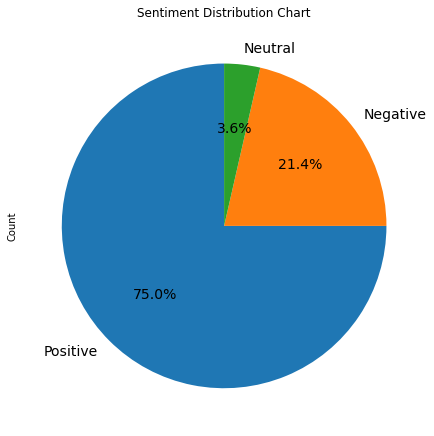

In [89]:
create_report(responses_df)

### Vader Sentiment Analysis

In [90]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def vader_sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
#     print("Overall sentiment dictionary is : ", sentiment_dict)
    return sentiment_dict['compound']
     
    
#     print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
#     print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
#     print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
 
#     print("Sentence Overall Rated As", end = " ")
 
    # decide sentiment as positive, negative and neutral
def getvader_sentiment(score):    
    if score >= 0.05 :
        return "Positive"
 
    elif score <= - 0.05 :
        return "Negative"
 
    else :
        return "Neutral"


In [91]:
vader_sentiment_scores("extremely depressed today")

Overall sentiment dictionary is :  {'neg': 0.642, 'neu': 0.358, 'pos': 0.0, 'compound': -0.5563}


-0.5563

In [92]:
responses_df['vader_sentiment_score'] = responses_df['prep'].apply(vader_sentiment_scores)
responses_df['vader_Polarity'] = responses_df['vader_sentiment_score'].apply(get_sentiment)

Overall sentiment dictionary is :  {'neg': 0.111, 'neu': 0.616, 'pos': 0.273, 'compound': 0.9565}
Overall sentiment dictionary is :  {'neg': 0.119, 'neu': 0.755, 'pos': 0.125, 'compound': 0.2263}
Overall sentiment dictionary is :  {'neg': 0.182, 'neu': 0.525, 'pos': 0.293, 'compound': 0.9735}
Overall sentiment dictionary is :  {'neg': 0.203, 'neu': 0.634, 'pos': 0.163, 'compound': -0.3612}
Overall sentiment dictionary is :  {'neg': 0.218, 'neu': 0.571, 'pos': 0.211, 'compound': 0.0202}
Overall sentiment dictionary is :  {'neg': 0.114, 'neu': 0.638, 'pos': 0.248, 'compound': 0.8973}
Overall sentiment dictionary is :  {'neg': 0.253, 'neu': 0.479, 'pos': 0.268, 'compound': 0.0516}
Overall sentiment dictionary is :  {'neg': 0.231, 'neu': 0.598, 'pos': 0.171, 'compound': -0.34}
Overall sentiment dictionary is :  {'neg': 0.312, 'neu': 0.412, 'pos': 0.276, 'compound': -0.5883}
Overall sentiment dictionary is :  {'neg': 0.167, 'neu': 0.509, 'pos': 0.325, 'compound': 0.9694}
Overall sentiment d

Overall sentiment dictionary is :  {'neg': 0.126, 'neu': 0.638, 'pos': 0.236, 'compound': 0.7724}
Overall sentiment dictionary is :  {'neg': 0.232, 'neu': 0.466, 'pos': 0.302, 'compound': 0.8036}
Overall sentiment dictionary is :  {'neg': 0.067, 'neu': 0.589, 'pos': 0.345, 'compound': 0.9937}
Overall sentiment dictionary is :  {'neg': 0.078, 'neu': 0.484, 'pos': 0.438, 'compound': 0.9954}
Overall sentiment dictionary is :  {'neg': 0.079, 'neu': 0.758, 'pos': 0.162, 'compound': 0.91}
Overall sentiment dictionary is :  {'neg': 0.068, 'neu': 0.6, 'pos': 0.333, 'compound': 0.9875}
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'compound': 0.8519}
Overall sentiment dictionary is :  {'neg': 0.129, 'neu': 0.569, 'pos': 0.302, 'compound': 0.9819}
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.25}
Overall sentiment dictionary is :  {'neg': 0.163, 'neu': 0.632, 'pos': 0.205, 'compound': -0.0516}
Overall sentiment dictionary 

In [93]:
responses_df.head()

,upload_id,transcriptions,prep,tb_sentiment_score,Polarity,vader_sentiment_score,vader_Polarity
0,10,so high our experience so far has been a littl...,high experience far little bit difficult teena...,0.004757,Positive,0.9565,Positive
1,209,I'm not going to stay in my name for the anony...,going stay name anonymity mid forty remotely w...,0.029898,Positive,0.2263,Positive
2,216,so far I have been florentines now for about a...,far florentine month half tough seems mean new...,-0.000634,Negative,0.9735,Positive
3,222,it has actually been a very difficult. Trying ...,actually difficult trying get adjusted change ...,0.192857,Positive,-0.3612,Negative
4,228,so this whole situation has been strange for u...,whole situation strange u feel lucky laid unem...,0.011815,Positive,0.0202,Positive
